# Setup

In [109]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Cleaning and Preparation

- Download the data
- Re-encoding categorical variables
- Doing the train / validation / test split


!wget https://github.com/gastonstat/CreditScoring/raw/master/CreditScoring.csv


https://github.com/gastonstat/CreditScoring

https://github.com/froukje/ml-zoomcamp/blob/main/week6/Lecture_6_Decision_Trees_Ensemble_Learning.ipynb

In [110]:
df = pd.read_csv("CreditScoring.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [111]:
df.columns = df.columns.str.lower()
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [112]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [113]:
# replace numbers with strings in categorical values
# define the map dictionaries
status_values = {
    1: "ok", 
    2: "default", 
    0: "unk"
}

home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}


# map the values of the dictionaries
df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)

In [114]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [115]:
#checking missing values

df.isnull().sum()
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


- We see that Income, assets and debt have max value 99999999.0
- Replace this number with nan

In [116]:
for c in ['income','assets', 'debt']:
    df[c] = df[c].replace(to_replace= 99999999, value= np.nan)

In [117]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [118]:
#looking at the status variable again
df.status.value_counts()

status
ok         3200
default    1254
unk           1
Name: count, dtype: int64

In [119]:
df = df[df.status != 'unk'].reset_index(drop=True)

In [120]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [121]:
# Do train / validation / test split
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [122]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

define y as status

set the default values to 1 and the ok values to 0

In [123]:
y_train = (df_train.status == "default").astype(int)
y_val = (df_val.status == "default").astype(int)
y_test = (df_test.status == "default").astype(int)

In [124]:
# remove status column from dataframe
del df_train["status"]
del df_val["status"]
del df_test["status"]

In [125]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897


## Decision Trees

- How a decision tree looks like
- Training a decision tree
- Overfitting
- Controlling the size of a tree

https://www.youtube.com/watch?v=_Ft1qDzmX68 - codebasics video decision tree

![alt text](img.png "Title")


In [126]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else:
            client['job'] == 'ok'
    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

In [127]:
#take first as example
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [128]:
assess_risk(xi)

'ok'

the above decision tree was hard coded but we can train the decicison tree on the dataset and it will learn the decisions by itself

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [130]:
train_dict = df_train.fillna(0).to_dict(orient = 'records')
val_dict = df_val.fillna(0).to_dict(orient = 'records')
train_dict

[{'seniority': 10,
  'home': 'owner',
  'time': 36,
  'age': 36,
  'marital': 'married',
  'records': 'no',
  'job': 'freelance',
  'expenses': 75,
  'income': 0.0,
  'assets': 10000.0,
  'debt': 0.0,
  'amount': 1000,
  'price': 1400},
 {'seniority': 6,
  'home': 'parents',
  'time': 48,
  'age': 32,
  'marital': 'single',
  'records': 'yes',
  'job': 'fixed',
  'expenses': 35,
  'income': 85.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1100,
  'price': 1330},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 40,
  'marital': 'married',
  'records': 'no',
  'job': 'fixed',
  'expenses': 75,
  'income': 121.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1320,
  'price': 1600},
 {'seniority': 1,
  'home': 'parents',
  'time': 48,
  'age': 23,
  'marital': 'single',
  'records': 'no',
  'job': 'partime',
  'expenses': 35,
  'income': 72.0,
  'assets': 0.0,
  'debt': 0.0,
  'amount': 1078,
  'price': 1079},
 {'seniority': 5,
  'home': 'owner',
  'time': 36,
  'age': 46,
  'm

In [131]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

In [132]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [133]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

In [134]:
roc_auc_score(y_val, y_pred)

0.6621358165217602

The score is not very high, look at the roc_auc_score for the train set


In [135]:
y_pred_train = model.predict_proba(X_train)[:,1]
y_pred_train

array([1., 1., 0., ..., 0., 0., 0.])

In [136]:
roc_auc_score(y_train, y_pred_train)

1.0

- Our model is overfitting
- It memorizes the training data, but does not generalize
- This happens, because we did not restrict the tree, but it can learn very specific conditions
- One possibility to avoid this is to restrict the depth

In [137]:
#retraiing the model with max depth = 3
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [138]:
y_pred = model.predict_proba(X_val)[:,1]

In [139]:
ras = roc_auc_score(y_val, y_pred)
print(f"roc_auc_score on validation data: {ras}")

#traiunign data
y_pred_train = model.predict_proba(X_train)[:,1]
ras_train = roc_auc_score(y_train, y_pred_train)
print(f"roc_auc_score on training data: {ras_train}")

roc_auc_score on validation data: 0.7389079944782155
roc_auc_score on training data: 0.7761016984958594


In [140]:
from sklearn.tree import export_text

print(export_text(model))

|--- feature_25 <= 0.50
|   |--- feature_27 <= 6.50
|   |   |--- feature_1 <= 862.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  862.50
|   |   |   |--- class: 1
|   |--- feature_27 >  6.50
|   |   |--- feature_12 <= 103.50
|   |   |   |--- class: 1
|   |   |--- feature_12 >  103.50
|   |   |   |--- class: 0
|--- feature_25 >  0.50
|   |--- feature_16 <= 0.50
|   |   |--- feature_12 <= 74.50
|   |   |   |--- class: 0
|   |   |--- feature_12 >  74.50
|   |   |   |--- class: 0
|   |--- feature_16 >  0.50
|   |   |--- feature_2 <= 8750.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  8750.00
|   |   |   |--- class: 0



In [141]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=unk', 'marital=widow', 'price', 'records=no',
       'records=yes', 'seniority', 'time'], dtype=object)

In [142]:
print(export_text(model, feature_names= dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



## Decision tree Algorithm Learning

- Finding the best plit for one column
- Finding the best split for the entire dataset
- Stopping criteria
- Decision tree learning algorithm

In [143]:
# simple dataset
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

# transform to dataframe
df_example = pd.DataFrame(data, columns=["assets", "status"])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


- Train a decision tree using the "assets" column
- We then have a model that decides the status only on the value of "assets"
- When assets > threshold, the default status will be ok, else it will be default
- We look for the best threshold
- I.e. we split the dataset in two sets
1. assets < threshold
2. assets >= threshold
- What are possible values for the threshold?
- Look at the dataset, sorted for values of asset

In [144]:
df_example.sort_values("assets")

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


We could then split the data at asset = 2000, asset = 3000, assets = 4000, assets = 5000 or , assets = 8000.

Other values would either lead to the same results or to an empty s

In [145]:
from IPython.display import display


In [146]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]


for T in Ts:

    print(f'Threshold: {T}')
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]

    display(df_left)
    print(df_left.status.value_counts(normalize=True))

    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print()

Threshold: 0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

Threshold: 2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

Threshold: 3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

Threshold: 4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

Threshold: 5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

Threshold: 8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [147]:
# Add another feature to the data
# simple dataset
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000, 500, 'ok'],
    [3000, 2000, 'default'],
]

# transform to dataframe
df_example = pd.DataFrame(data, columns=["assets", "debt", "status"])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [148]:
df_example.sort_values("debt")


,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


Possible thresholds: debt = 500, debt = 1000, debt = 2000
Do the same as before, but generalize a bit

In [149]:
Ts = [500, 1000, 2000]

# more general, put all thresholds in a dictionary
thresholds = {
    "assets": [0, 2000, 3000, 4000, 5000, 8000],
    "debt": [500, 1000, 2000]
} 

for feature, Ts in thresholds.items():
    print(20*'#')
    print(feature)
    for T in Ts:
    
        print(f"threshold: {T}")
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]
    
        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))
        print()

####################
assets
threshold: 0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

threshold: 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

threshold: 3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

threshold: 4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

threshold: 5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

threshold: 8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

####################
debt
threshold: 500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

threshold: 1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

threshold: 2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64



![alt text](df.png "Title")

## Decision Tree Parameter tuning

- selecting max_depth: The maximal depth of the tree
- selecting min_samples_leaf: This is the minimum number of samples in the leaf node to continue splitting
- Parameter tuning means, select paramters, such that the chosen metric on the validation data is maximized, in this case the metric is auc

In [150]:
X_train

<2672x29 sparse matrix of type '<class 'numpy.float64'>'
	with 34736 stored elements in Compressed Sparse Row format>

In [151]:
# first max_depth
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)
    print(f"depth: {str(d):4s}, auc: {auc:.3f}")

depth: 1   , auc: 0.606
depth: 2   , auc: 0.669
depth: 3   , auc: 0.739
depth: 4   , auc: 0.761
depth: 5   , auc: 0.767
depth: 6   , auc: 0.761
depth: 10  , auc: 0.699
depth: 15  , auc: 0.664
depth: 20  , auc: 0.652
depth: None, auc: 0.668


- Best depths values are between 4, 5 and 6
- Look at min_samples_leaf for these depths

In [152]:
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        print(f"depth: {str(d):4s}, min_sample_leaf: {s:4}, auc: {auc:.3f}")

depth: 4   , min_sample_leaf:    1, auc: 0.761
depth: 4   , min_sample_leaf:    2, auc: 0.761
depth: 4   , min_sample_leaf:    5, auc: 0.761
depth: 4   , min_sample_leaf:   10, auc: 0.761
depth: 4   , min_sample_leaf:   15, auc: 0.764
depth: 4   , min_sample_leaf:   20, auc: 0.761
depth: 4   , min_sample_leaf:  100, auc: 0.756
depth: 4   , min_sample_leaf:  200, auc: 0.747
depth: 4   , min_sample_leaf:  500, auc: 0.680
depth: 5   , min_sample_leaf:    1, auc: 0.766
depth: 5   , min_sample_leaf:    2, auc: 0.767
depth: 5   , min_sample_leaf:    5, auc: 0.768
depth: 5   , min_sample_leaf:   10, auc: 0.762
depth: 5   , min_sample_leaf:   15, auc: 0.772
depth: 5   , min_sample_leaf:   20, auc: 0.774
depth: 5   , min_sample_leaf:  100, auc: 0.763
depth: 5   , min_sample_leaf:  200, auc: 0.759
depth: 5   , min_sample_leaf:  500, auc: 0.680
depth: 6   , min_sample_leaf:    1, auc: 0.744
depth: 6   , min_sample_leaf:    2, auc: 0.765
depth: 6   , min_sample_leaf:    5, auc: 0.763
depth: 6   , 

In [153]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, s, auc))

In [154]:
scores

[(4, 1, 0.7612827250490422),
 (4, 2, 0.7612827250490422),
 (4, 5, 0.7612827250490422),
 (4, 10, 0.7612827250490422),
 (4, 15, 0.7637257513743916),
 (4, 20, 0.760910367876777),
 (4, 100, 0.7559365236976581),
 (4, 200, 0.7472602988544719),
 (4, 500, 0.679842459615897),
 (5, 1, 0.7669377103969388),
 (5, 2, 0.7664957254607541),
 (5, 5, 0.7681728463829891),
 (5, 10, 0.7622756775084158),
 (5, 15, 0.7721416289264004),
 (5, 20, 0.7735372114988738),
 (5, 100, 0.7633836671429609),
 (5, 200, 0.7590728003681189),
 (5, 500, 0.679842459615897),
 (6, 1, 0.7600869438860769),
 (6, 2, 0.7505418856409386),
 (6, 5, 0.7593210384829624),
 (6, 10, 0.7782991450921508),
 (6, 15, 0.785470804775859),
 (6, 20, 0.7733374100893656),
 (6, 100, 0.7764343319367417),
 (6, 200, 0.7682666924995762),
 (6, 500, 0.679842459615897)]

In [155]:
columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()


,max_depth,min_samples_leaf,auc
0,4,1,0.761283
1,4,2,0.761283
2,4,5,0.761283
3,4,10,0.761283
4,4,15,0.763726


In [156]:
df_scores.sort_values("auc", ascending=False)

,max_depth,min_samples_leaf,auc
22,6,15,0.785471
21,6,10,0.778299
24,6,100,0.776434
14,5,20,0.773537
23,6,20,0.773337
13,5,15,0.772142
25,6,200,0.768267
11,5,5,0.768173
9,5,1,0.766938
10,5,2,0.766496


In [157]:
df_scores_pivot = df_scores.pivot(index = 'min_samples_leaf', columns=['max_depth'],values=["auc"])

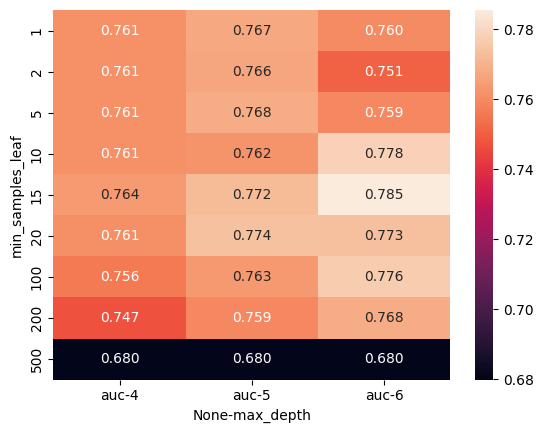

In [158]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f");

Train the final Decision Tree


In [159]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

## Ensembles and Random Forests


Board of experts
- The idea of a Random Foret is to have several Decision Trees and let each decide by its own, we then take the average of there decisions if we have a regression problem or the majority class if we have a classification problem
- Why Random? If we use the same parameters for each tree, all would be the same, and then the result of each would be the same
- In a Random Forest each tree gets a random subset of features, e.g. we have a total of 10 features, but each tree gets only 7 of them and these are different for each tree.
-Ensembling models
- Random forest - ensembling decision trees

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train,y_train)


RandomForestClassifier(n_estimators=10)

In [162]:
y_pred = rf.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred)

0.7910410258894189

In [163]:
rf.predict_proba(X_val[[0]])

array([[1., 0.]])

The Random Forest gives different results each time we train again, because of the random features in it
To avoit this we can set a random seed

In [164]:
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred)
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

try different number of estimators?

In [165]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]

    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [166]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators',"auc" ])
df_scores

,n_estimators,auc
0,10,0.774473
1,20,0.802239
2,30,0.811820
3,40,0.813912
4,50,0.815480
5,60,0.814872
6,70,0.816234
7,80,0.815081
8,90,0.815229
9,100,0.815665


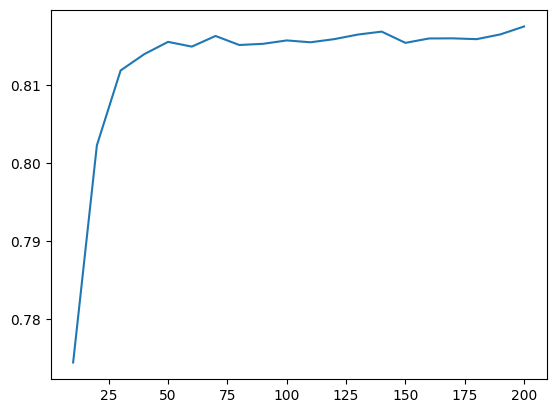

In [167]:
plt.plot(df_scores.n_estimators, df_scores.auc);

- Performance is improving util ~50 trees
- We can now tune the Random Forest, the parameters we tune are the same as in Decision Trees as the Random Forest constits of Decision Trees

In [168]:
scores = []

for d in [5,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [169]:
scores

[(5, 10, 0.7876988932212832),
 (5, 20, 0.7977313458138577),
 (5, 30, 0.8003045457847957),
 (5, 40, 0.7997081688503548),
 (5, 50, 0.7998776973190285),
 (5, 60, 0.8011673245985809),
 (5, 70, 0.8022026591751228),
 (5, 80, 0.8032379937516649),
 (5, 90, 0.8034468770434235),
 (5, 100, 0.804385338209295),
 (5, 110, 0.8065226078322152),
 (5, 120, 0.8065165532440484),
 (5, 130, 0.8079938727567751),
 (5, 140, 0.8068495555932285),
 (5, 150, 0.8072552130004118),
 (5, 160, 0.8070675207672374),
 (5, 170, 0.8068192826523939),
 (5, 180, 0.807176503354242),
 (5, 190, 0.8069948657092345),
 (5, 200, 0.8072794313530793),
 (10, 10, 0.7958180959531134),
 (10, 20, 0.8105973456685476),
 (10, 30, 0.8135096025768327),
 (10, 40, 0.8190132232205567),
 (10, 50, 0.8181595262890218),
 (10, 60, 0.8190858782785595),
 (10, 70, 0.8205026519096171),
 (10, 80, 0.8211323290789759),
 (10, 90, 0.8213139667239836),
 (10, 100, 0.8226157031798697),
 (10, 110, 0.8240445859872612),
 (10, 120, 0.8243049332784385),
 (10, 130, 0.825

In [170]:
columns=["max_depth", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.787699
1,5,20,0.797731
2,5,30,0.800305
3,5,40,0.799708
4,5,50,0.799878


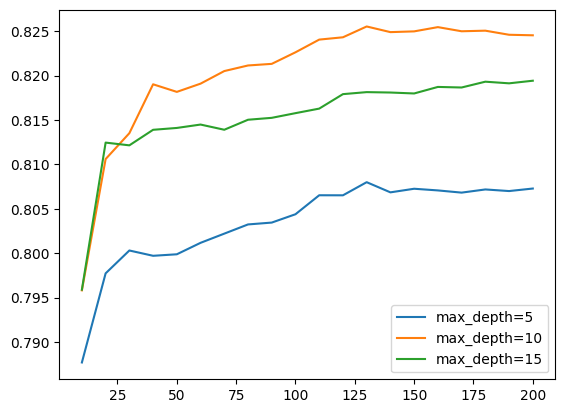

In [171]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth==d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")
plt.legend();

We can see that max_depth=10 seems to be the best


In [172]:
scores = []
max_depth=10

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, 
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [173]:
columns=["min_samples_leaf", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.795818
1,1,20,0.810597
2,1,30,0.813510
3,1,40,0.819013
4,1,50,0.818160


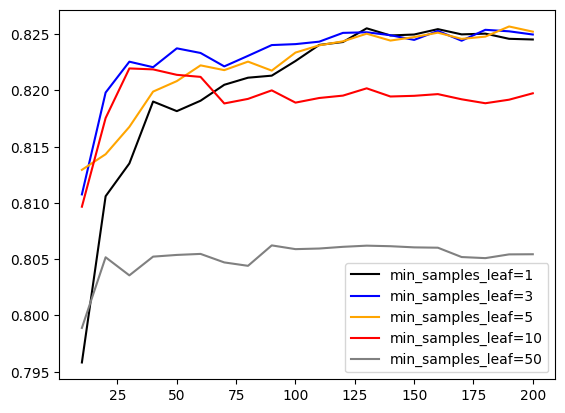

In [174]:
colors = ["black", "blue", "orange", "red", "grey"]
min_samples_leaf_values = [1, 3, 5, 10, 50]

for s, col in zip(min_samples_leaf_values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf==s]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"min_samples_leaf={s}", color=col)
plt.legend();

The best values for min_samples_leaf are 1, 3, 5, in this example we set min_samples_leaf=3


In [175]:
min_samples_leaf = 3

# Train Random Forest with these values
rf = RandomForestClassifier(n_estimators=100, 
                                    max_depth=max_depth,
                                    min_samples_leaf=min_samples_leaf,
                                    random_state=1)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=3, random_state=1)

Other useful parameters:
- max_features: Sets how many features each tree gets
- bootstrap: Another way of randomization on the row level
- n_jobs: To parallize the training of the Desicion Trees
- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Gradient Boosting and XGBoost

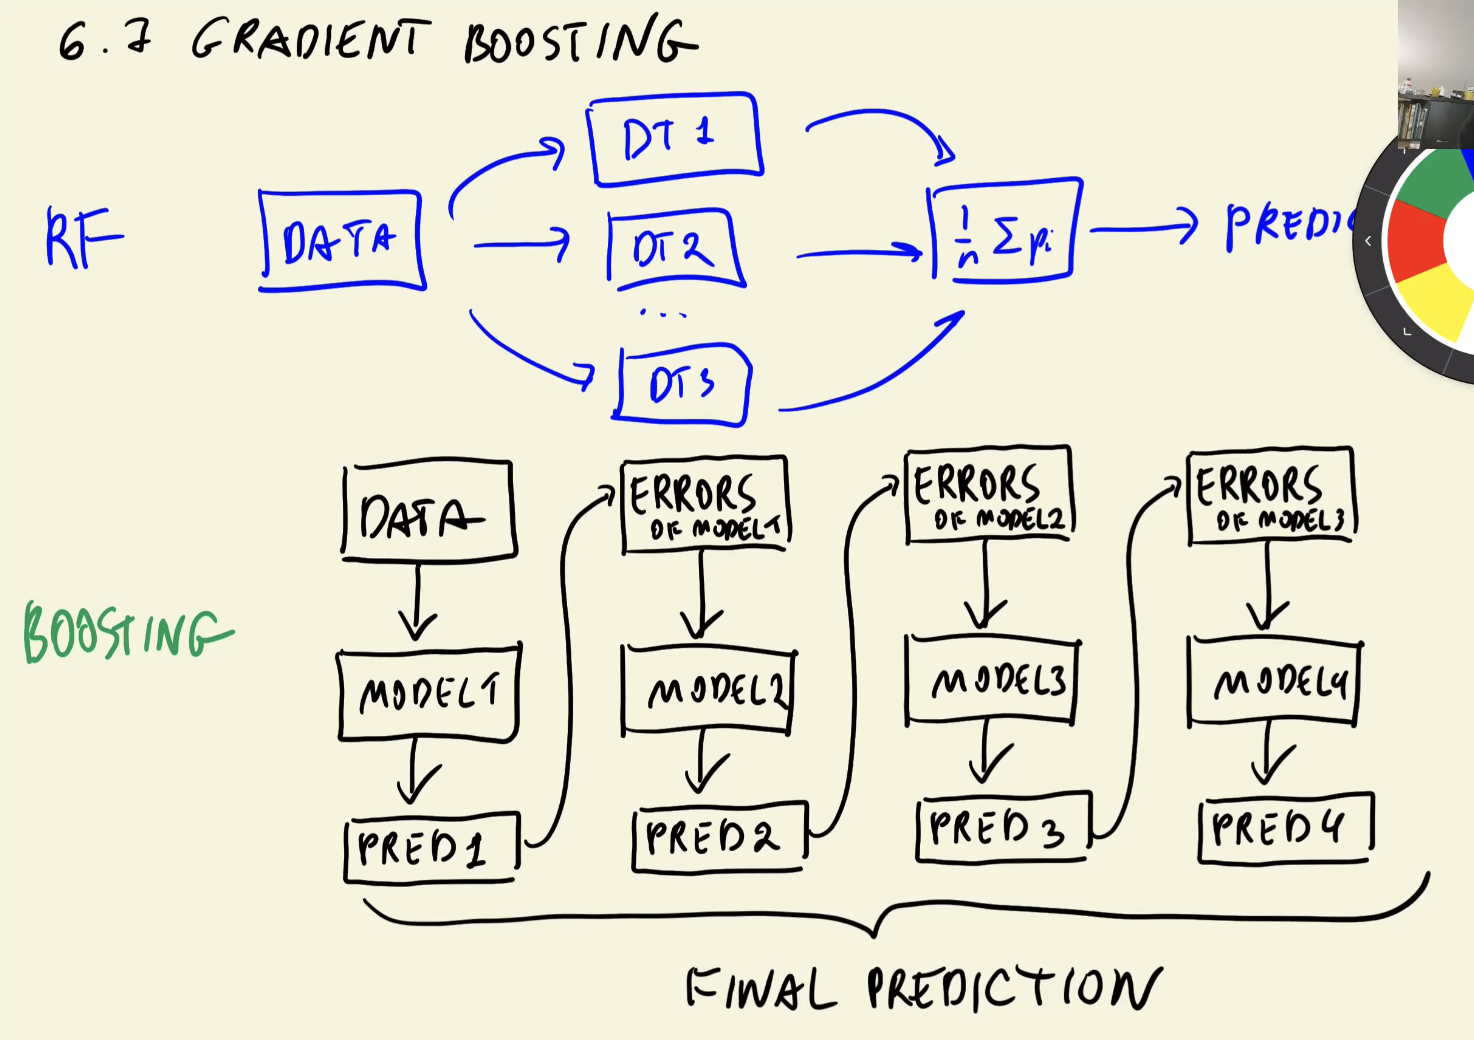

-  Gradient Boosting
     - Gradient Boosting: A different way of combining various decision trees
     - First make a prediction with one model and creating a second model based on the first model's error.
     - We will use XGBoost in this course

In [176]:
import xgboost as xgb

- Wrap the training data in a special data structure
- For training we need to define the parameters
     - Important parameters
        - eta - learning rate
        - max_depth
        - min_child_weight - same as min_sample_weight
     - objective: defines the task, in our case it is binary classifciation
     - nthread: to parallize training
     - seed: to set a rnadom seed
     - verbosity: = 1 to see warnings while training 

In [177]:
features

['age',
 'amount',
 'assets',
 'debt',
 'expenses',
 'home=ignore',
 'home=other',
 'home=owner',
 'home=parents',
 'home=private',
 'home=rent',
 'home=unk',
 'income',
 'job=fixed',
 'job=freelance',
 'job=others',
 'job=partime',
 'job=unk',
 'marital=divorced',
 'marital=married',
 'marital=separated',
 'marital=single',
 'marital=unk',
 'marital=widow',
 'price',
 'records=no',
 'records=yes',
 'seniority',
 'time']

In [178]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [179]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1
}

In [180]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [181]:
y_pred = model.predict(dval)


In [182]:
roc_auc_score(y_val, y_pred)

0.8065256351262986

- the perfomrance of model depends on the num_boost_round
- evaluate model after each round using a watchlist

In [183]:
watchlist = [(dtrain, "train"), (dval, "val")]

# num_boost_round=200 is the number of trees we let grow
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.86730	val-auc:0.77938
[1]	train-auc:0.89140	val-auc:0.78964
[2]	train-auc:0.90699	val-auc:0.79010
[3]	train-auc:0.91677	val-auc:0.79967
[4]	train-auc:0.92246	val-auc:0.80443
[5]	train-auc:0.93086	val-auc:0.80858
[6]	train-auc:0.93675	val-auc:0.80981
[7]	train-auc:0.94108	val-auc:0.80872
[8]	train-auc:0.94809	val-auc:0.80456
[9]	train-auc:0.95100	val-auc:0.80653
[10]	train-auc:0.95447	val-auc:0.80851
[11]	train-auc:0.95672	val-auc:0.81052
[12]	train-auc:0.95818	val-auc:0.81389
[13]	train-auc:0.96071	val-auc:0.81270
[14]	train-auc:0.96333	val-auc:0.81265
[15]	train-auc:0.96554	val-auc:0.81334
[16]	train-auc:0.96669	val-auc:0.81510
[17]	train-auc:0.96951	val-auc:0.81573
[18]	train-auc:0.97113	val-auc:0.81667
[19]	train-auc:0.97261	val-auc:0.81811
[20]	train-auc:0.97464	val-auc:0.81729
[21]	train-auc:0.97560	val-auc:0.81780
[22]	train-auc:0.97653	val-auc:0.81656
[23]	train-auc:0.97773	val-auc:0.81636
[24]	train-auc:0.97809	val-auc:0.81613
[25]	train-auc:0.97953	val-auc:0.81

- To not evaluate every step, we can set verbose_eval


In [184]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)


[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

- It is quite difficult to extract this information from xgboost and plot it
- A possibility is to use the jupyter-notebook magic command "capture" to capture the output of a cell

In [185]:
%%capture output

xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [188]:
print(output.stdout)

s= output.stdout


[0]	train-auc:0.86730	val-auc:0.77938
[5]	train-auc:0.93086	val-auc:0.80858
[10]	train-auc:0.95447	val-auc:0.80851
[15]	train-auc:0.96554	val-auc:0.81334
[20]	train-auc:0.97464	val-auc:0.81729
[25]	train-auc:0.97953	val-auc:0.81686
[30]	train-auc:0.98579	val-auc:0.81543
[35]	train-auc:0.99011	val-auc:0.81206
[40]	train-auc:0.99421	val-auc:0.80922
[45]	train-auc:0.99548	val-auc:0.80842
[50]	train-auc:0.99653	val-auc:0.80918
[55]	train-auc:0.99765	val-auc:0.81114
[60]	train-auc:0.99817	val-auc:0.81172
[65]	train-auc:0.99887	val-auc:0.80798
[70]	train-auc:0.99934	val-auc:0.80870
[75]	train-auc:0.99965	val-auc:0.80555
[80]	train-auc:0.99979	val-auc:0.80549
[85]	train-auc:0.99988	val-auc:0.80374
[90]	train-auc:0.99993	val-auc:0.80409
[95]	train-auc:0.99996	val-auc:0.80548
[100]	train-auc:0.99998	val-auc:0.80509
[105]	train-auc:0.99999	val-auc:0.80629
[110]	train-auc:1.00000	val-auc:0.80637
[115]	train-auc:1.00000	val-auc:0.80494
[120]	train-auc:1.00000	val-auc:0.80574
[125]	train-auc:1.0000

In [189]:
line = s.split("\n")[0]
line
num_iter, train_auc, val_auc = line.split("\t")
num_iter, train_auc, val_auc

('[0]', 'train-auc:0.86730', 'val-auc:0.77938')

In [195]:
def parse_xgb_output(output):
    results =[]

    for line in output.strip().split("\n"):
        num_iter, train_auc, val_auc = line.split("\t")
        
        num_iter = int(num_iter.strip("[]"))
        train_auc = float(train_auc.split(":")[1])
        val_auc = float(val_auc.split(":")[1])

        results.append((num_iter, train_auc, val_auc))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)

    return df_results
 
df_score = parse_xgb_output(s)
df_score.head()

,num_iter,train_auc,val_auc
0,0,0.86730,0.77938
1,5,0.93086,0.80858
2,10,0.95447,0.80851
3,15,0.96554,0.81334
4,20,0.97464,0.81729


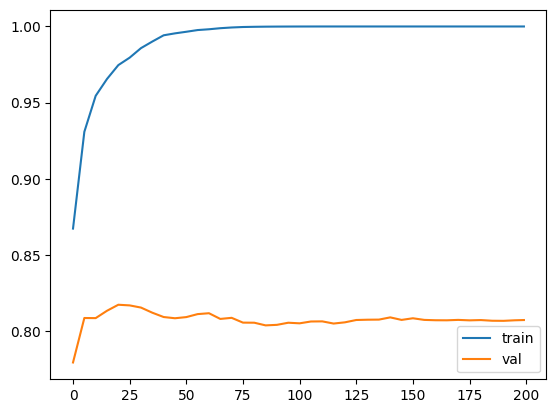

In [198]:
plt.plot(df_score.num_iter, df_score.train_auc, label = "train")
plt.plot(df_score.num_iter, df_score.val_auc, label = "val");
plt.legend();

- we can see that we are overfitting 

## XGBoost parameter tuning

- Tuning the following parameters
    - eta : learning rate, stepsize
        - defines how much weight the next model has 
        - eg. eta =1 only the next model's prediction are used, eta 0.3, 30% of the next model's prediction will be used
    - max_depth
    - min_child_weight

In [238]:
scores = {}

In [254]:
%%capture output

xgb_params = {
    "eta": 1.0,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [255]:
key = f'eta={xgb_params["eta"]}'
scores[key] = parse_xgb_output(output.stdout)

In [256]:
scores.keys()

dict_keys(['eta=0.3', 'eta=0.1', 'eta=0.05', 'eta=0.01', 'eta=1.0'])

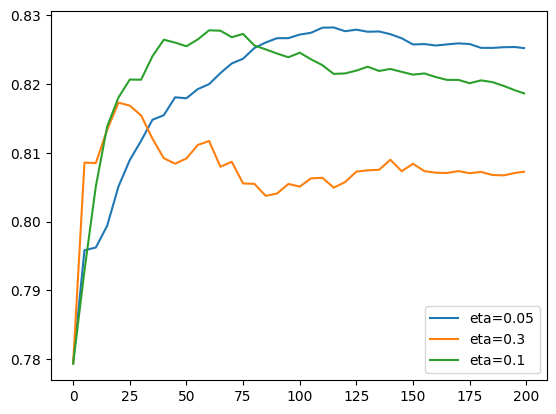

In [257]:
etas = ["eta=0.05", "eta=0.3", "eta=0.1"]
for eta in etas:
    df_score = scores[eta] 
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
plt.legend()

- eta 0.1 seems to be the best 
- take this as baseline to optimize max_depth

In [258]:
scores ={}

In [269]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [270]:
key = f"max_depth={xgb_params['max_depth']}"
scores[key] = parse_xgb_output(output.stdout)

In [271]:
scores.keys()

dict_keys(['max_depth=10', 'max_depth=3', 'max_depth=4', 'max_depth=6'])

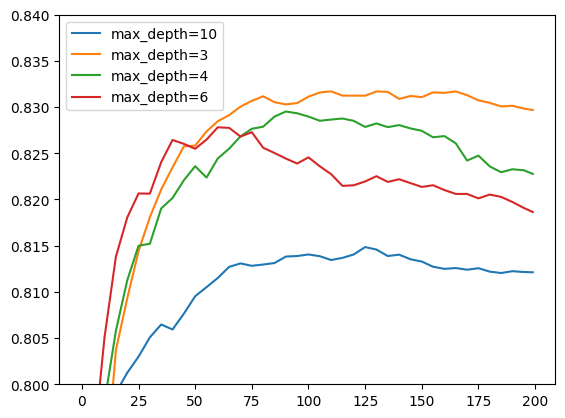

In [272]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)

plt.ylim(0.8,0.84)
plt.legend()

max_depth = 3 keeps growing the longest, keep this as baseline


In [273]:
scores = {}

In [280]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 1,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [281]:
key = f"min_child_weight={xgb_params['min_child_weight']}"
scores[key] = parse_xgb_output(output.stdout)

In [282]:
scores.keys()


dict_keys(['min_child_weight=30', 'min_child_weight=10', 'min_child_weight=1'])

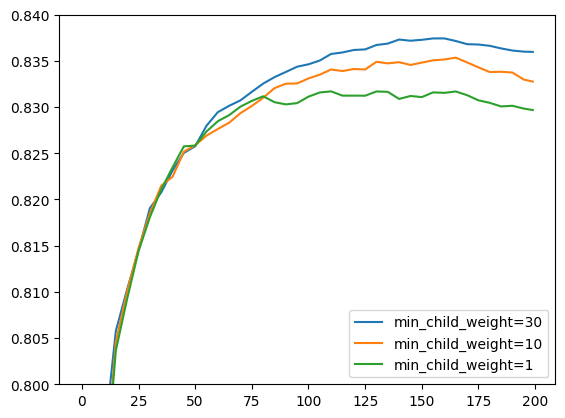

In [283]:
for key, df_scores in scores.items():
    plt.plot(df_scores.num_iter, df_scores.val_auc, label=key)
plt.ylim(0.8,0.84)
plt.legend()

The values are very close, we will stay with min_child_weight=1

Now we will train this model and choose the number of iteratins to 175


In [284]:
%%capture output

xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=175)

Documentation: https://xgboost.readthedocs.io/en/stable/\

Other useful parameters:

    subsample (How many rows for each tree) and colsample_bytree (How many features for each tree)
        Both between 0 and 1
    lambda and alpha

## Selecting the final model

- Choosing between XGBoost, Random Forest and Decision Tree
- Training the final model
- Saving the model

In [285]:
# The best decision tree model
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [287]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.7856948245380349

In [288]:
# The best random forest
rf = RandomForestClassifier(n_estimators=200, 
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [289]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8249709379767989

In [290]:
# The best XGBoost
xgb_params = {
    "eta": 0.1,
    "max_depth": 3,
    "min_child_weight": 30,
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1
}

model = xgb.train(xgb_params, dtrain, 
                  num_boost_round=175)

In [291]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.836632074786273

XGBoost is the best model

Now train the final model and use the entire dataset

In [292]:
df_full_train = df_full_train.reset_index(drop=True)


In [293]:
y_full_train = (df_full_train["status"] == "default").astype(int).values
y_full_train

array([0, 1, 0, ..., 0, 0, 1])

In [294]:
del df_full_train["status"]


In [295]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [296]:
dicts_test = df_test.to_dict(orient="records")
X_test = dv.transform(dicts_test)

In [302]:
features = list(dv.get_feature_names_out())
dfull_train = xgb.DMatrix(X_full_train, label=y_full_train, feature_names=features)
dtest = xgb.DMatrix(X_test, feature_names=features)

model = xgb.train(xgb_params, dfull_train, num_boost_round=175)

In [305]:
y_pred = model.predict(dtest)
roc_auc_score(y_test, y_pred)

0.8311543912809736

- The auc score is similar to the auc score on the train set
- Our model did not overfit
- XGBoost is often very good on this type of data (tabular data), downsie: more difficult to tune, because it has more paramters

## Summary

- Finding the best split: select the least impure split. 
- This algorithm can overfit, that's why we control it by limiting the max depth and the size of the group
- Random Forests are a way of combining multiple decision trees. It shoud have a diverse set of models to make good predictions
- Gradient boosting trains models sequentially, each model tries to fix the errors of the previous one. XGBoost is an implementation of gradient boosting.
